# Descriptive Statistics

In [44]:
#Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import unidecode
from dateutil.parser import parse
from collections import Counter
import os
import re
import string
import nltk
import spacy 
exclude = set(string.punctuation)
nltk.download('stopwords')
from nltk.corpus import stopwords
from string import punctuation
stopw = list(set(stopwords.words('portuguese') + list(punctuation)))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Verena\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
#Importing stopwords in portuguese also from spacy library
import pt_core_news_md
nlp = pt_core_news_md.load()
stopw=list(spacy.lang.pt.stop_words.STOP_WORDS)

In [46]:
#Adding additional words to remove from texts (not relevant for context)

stopw+=['portal','eletronico','cep','fone','mail','email','e','centro','ltda','para','site','copyright',
        'digitalmentepor','fls','paulo','sao','digitalmente','wlra','oliveira','ely','limeira','que','por','este','dos',
        'nos','com','sob','dos','das','oab','janeiro','fevereiro','marco','abril','maio','junho','julho','agosto','setembro',
        'outubro','novembro','dezembro','motta','bismarchi','gustavo','fls','ndeg','sp','loop','dia','ano','auto','codigo','mes',
        'cpf','cep','rua','endereco', 'fls.','oab','são','paulo','no','em','ndeg','foro','hmin','sno','spfalenciastjspgovbr','paulo','fls','no','dr',
        'copia','digitalmente','site','email','ashmin','art','ltda','rua','cep','janeiro','fevereiro','marco','abril',
        'maio','junho','julho','agosto','setembro','outubro','novembro','dezembro','marcelo','barbosa','sacramone','sob',
        'sobre','nome','assim','dias','apos','endereco','ainda','manifestese','decisaomandado','abib','infojud',
        'urupes','work','csm','moreira','henrique','wwwtjspjusbr','senha','sao paulo','nos','fls','paulo', 'paragrafo',
        'unico','estado','impressao','classe','assunto','conforme','fls.','oab','são','paulo','no','em','ndeg','foro','hmin','sno','spfalenciastjspgovbr','paulo','fls','no','dr',
        '-se','erika','epp','-la','-las','carro','chefe','rocha','teani','eit','valinhos','eis','pessoa','min','jose','praça']

In [47]:
#Importing data and detecting number of pages of each document
df=pd.read_csv('6_dados_rotulados.csv')

#Creating a variable of number of pages
df['n_paginas'] =  df['n_folha_fim'] - df['n_folha_inicio'] +  1
df.head()

,Unnamed: 0,n_processo,tipo_documento,string,n_folha_inicio,n_folha_fim,data_doc,nome_assinador,positive,negative,n_paginas
0,0,1031673-97.2014.8.26.0100,Decisão,".\n\nprovidencie a autora, em 10 (dez) dias, s...",31,31,23/04/2014,daniel carnio costa,0,0,1
1,1,1031673-97.2014.8.26.0100,Decisão,.\ncite-se a ré para apresentar contestação no...,76,76,27/06/2014,daniel carnio costa,0,0,1
2,2,1031673-97.2014.8.26.0100,Decisão,.\n\ndefiro a citação por edital. providencie ...,93,93,19/01/2016,daniel carnio costa,0,0,1
3,3,1031673-97.2014.8.26.0100,Decisão,".\nregularize a ré, no prazo de 48 horas, a su...",127,127,11/01/2017,daniel carnio costa,0,0,1
4,4,1031673-97.2014.8.26.0100,Decisão,.\nmanifeste-se o autor às fls. 112/124 e 130/...,133,133,17/04/2017,daniel carnio costa,0,0,1


In [48]:
#Function to support data cleaning

def sub_str(x): 

    lista=[]

    for x in x.split():

        x_2=re.sub(r'[^a-zA-Z0-9]','',x)
        x_new = re.sub("\d+",'',x_2)  
        lista+=[x_new]

    alpha_only_string = " ".join(lista)

    return alpha_only_string

#Removing terminations from portuguese words

for x in ['-lo','-la','-los','-las','-se']:
    df['string']=df['string'].str.replace(x,'')
    

In [49]:
#Replace emails and links, more cleaning,remove stopwords 

df['string']=df['string'].apply(lambda x:" ".join(x.split('\n')))
df['string']=df['string'].str.lower()
df['string']=df['string'].apply(lambda x:re.sub(r'http\S+', '', x))
df['string_clean']=df['string'].apply(lambda x:re.sub('([A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,})', '', x))
df['string_clean']=df['string_clean'].apply(lambda texto:sub_str(unidecode.unidecode(''.join(ch for ch in texto if ch not in exclude))))
df['string_clean']=df['string_clean'].apply(lambda x:" ".join(z for z in x.split() if len(z)>2))
df['string_clean']=df['string_clean'].apply(lambda x: " ".join([z for z in x.split() if z not in stopw]))

In [50]:
#Check most frequent words
Counter(" ".join(df["string_clean"]).split()).most_common(15)

[('nao', 36932),
 ('processo', 32867),
 ('falencia', 32000),
 ('judicial', 24002),
 ('lei', 22000),
 ('autos', 20750),
 ('pedido', 18652),
 ('prazo', 18128),
 ('administrador', 15306),
 ('intime', 15069),
 ('direito', 14515),
 ('justica', 13704),
 ('int', 13301),
 ('termos', 12945),
 ('artigo', 12696)]

# Charts

(-0.5, 799.5, 399.5, -0.5)

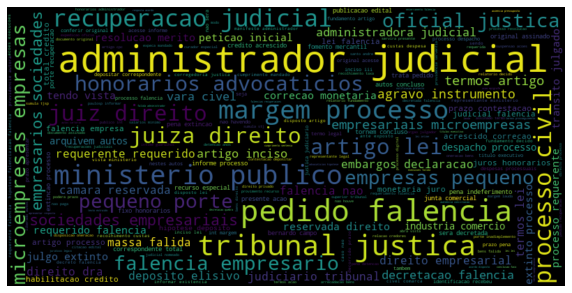

In [51]:
#Plot wordcloud to check most frequent words 
text  = '\n'.join(map(str, df['string_clean'].values.tolist()))
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the generated image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")

Text(0.5, 6.799999999999997, 'Nº de Páginas')

<Figure size 1080x360 with 0 Axes>

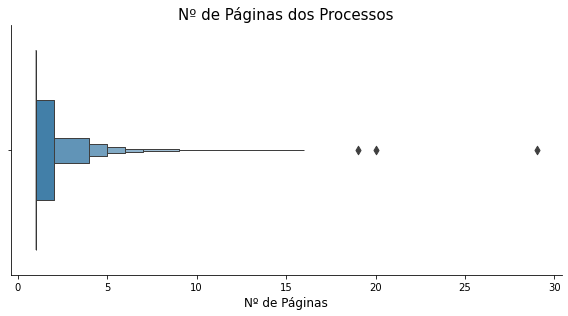

In [39]:
#Plot number of pages from documents
plt.figure(figsize=(15,5))
sns.catplot(x="n_paginas", kind="boxen", data=df, height=4, aspect=2)
plt.xticks(fontsize=10)
plt.title("Nº de Páginas dos Processos",fontsize=15)
plt.xlabel("Nº de Páginas",fontsize=12)

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0, -5.0, '−5'),
  Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25'),
  Text(0, 30.0, '30'),
  Text(0, 35.0, '35')])

<Figure size 1080x360 with 0 Axes>

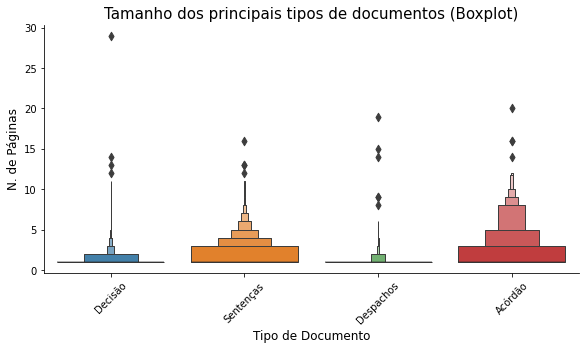

In [41]:
#Plot size of the main types of documents
plt.figure(figsize=(15,5))
sns.catplot(x="tipo_documento", y="n_paginas", kind="boxen", data=df, height=4, aspect=2)
plt.xticks(rotation=45,fontsize=10)
plt.title("Tamanho dos principais tipos de documentos (Boxplot)",fontsize=15)
plt.xlabel("Tipo de Documento",fontsize=12)
plt.ylabel("N. de Páginas", fontsize=12)
plt.yticks(fontsize=10)

C:\Users\Verena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000., 18000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

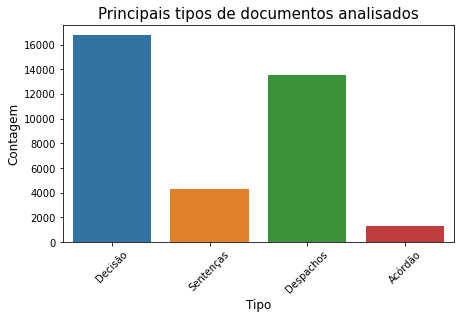

In [55]:
#Types of documents
plt.figure(figsize=(7,4))
sns.countplot(df['tipo_documento'])
plt.xticks(rotation=45,fontsize=10)
plt.title("Principais tipos de documentos analisados",fontsize=15)
plt.xlabel("Tipo",fontsize=12)
plt.ylabel("Contagem", fontsize=12)
plt.yticks(fontsize=10)